In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import argparse
import numpy as np
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


notebook_dir = os.getcwd()
target_path = os.path.abspath(os.path.join(notebook_dir, '../Python_Code'))
sys.path.append(target_path)
from dataGenerator import DataGenerator

import util

# Constants
num_classes = 20
window_size = 50
epoch = 15

2025-05-22 16:26:02.152148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 16:26:02.163554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 16:26:02.166929: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 16:26:02.176836: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 16:26:02.780825: W tensorflow/compiler/tf2

In [3]:
model_dir = '../Data/fine_grained/Classroom/80MHz/3mo/Classroom_m1m2m3.h5'
model = load_model(model_dir)


I0000 00:00:1747941965.097183 2579147 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747941965.138765 2579147 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747941965.144091 2579147 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747941965.148280 2579147 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [4]:
def evaluate_subject_with_data_from(model, test_environment, test_monitor, nr_subcarriers=242):
  test_dir = f'../Data/fine_grained/{test_environment}/80MHz/3mo/{test_monitor}/Slots/Test'
  test_csv = os.path.join(test_dir, 'test_set.csv')
  window_size = 50
  labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']

  test_gen = DataGenerator(test_dir, test_csv, nr_subcarriers, len(labels), (window_size, nr_subcarriers, 2), batchsize=64, shuffle=False)

  final_loss, final_accuracy = model.evaluate(test_gen)
  return final_loss, final_accuracy

In [5]:
test_environments  = ['Classroom', 'Office']
test_monitors  = ['m1', 'm2', 'm3']

results = {'test_environments': [], 'test_monitors': [], 'final_loss': [], 'final_accuracy': []}
for test_environment in test_environments:
  for test_monitor in test_monitors:
    print(f"Evaluating multi-environment multi-monitor against {test_environment} {test_monitor}")
    final_loss, final_accuracy = evaluate_subject_with_data_from(model, test_environment, test_monitor)
    results['test_environments'].append(test_environment)
    results['test_monitors'].append(test_monitor)
    results['final_loss'].append(final_loss)
    results['final_accuracy'].append(final_accuracy)

Evaluating multi-environment multi-monitor against Classroom m1


/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1747942097.697382 2579311 service.cc:146] XLA service 0x76dba800aa50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747942097.697408 2579311 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-05-22 16:28:17.711506: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-22 16:28:17.782197: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907

  5/308 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 1.0000 - loss: 2.7872e-04

I0000 00:00:1747942098.427198 2579311 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


308/308 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9773 - loss: 0.0990
Evaluating multi-environment multi-monitor against Classroom m2
  1/295 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 1.0000 - loss: 2.9290e-04

/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9472 - loss: 0.1828
Evaluating multi-environment multi-monitor against Classroom m3
  1/305 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.9688 - loss: 0.0980

/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


305/305 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9423 - loss: 0.3375
Evaluating multi-environment multi-monitor against Office m1
  1/479 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 1.0000 - loss: 3.1664e-06

/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


479/479 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9574 - loss: 0.3912
Evaluating multi-environment multi-monitor against Office m2
  1/488 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 1.0000 - loss: 0.0068

/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


488/488 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.9237 - loss: 0.2990
Evaluating multi-environment multi-monitor against Office m3
  1/458 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 1.0000 - loss: 7.9825e-04

/home/diogo/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9624 - loss: 0.1625


In [6]:
results_df = pd.DataFrame(results)
results_df.to_csv('SAIDAS/07-results_fine_grained_multimonitor_multienvironment.csv', index=False)
results_df

,test_environments,test_monitors,final_loss,final_accuracy
0,Classroom,m1,0.124112,0.973214
1,Classroom,m2,0.127911,0.962553
2,Classroom,m3,0.317072,0.945441
3,Office,m1,0.325611,0.956485
4,Office,m2,0.253615,0.933049
5,Office,m3,0.183535,0.952306


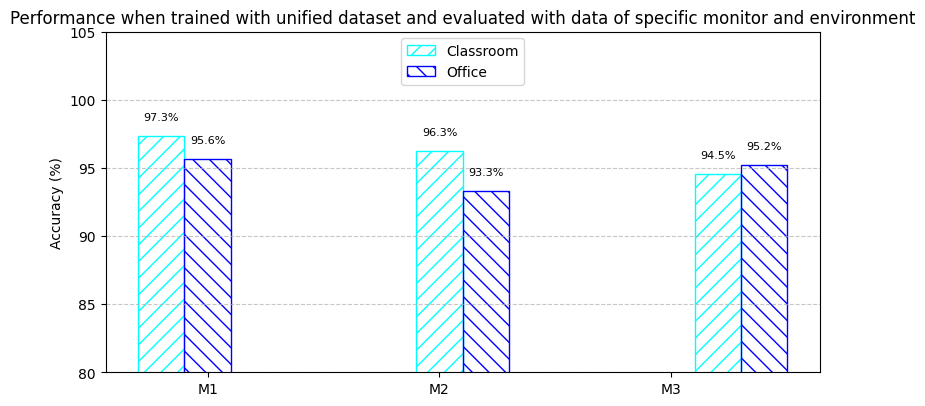

,test_environments,test_monitors,final_loss,final_accuracy
0,Classroom,m1,0.124112,0.973214
1,Classroom,m2,0.127911,0.962553
2,Classroom,m3,0.317072,0.945441
3,Office,m1,0.325611,0.956485
4,Office,m2,0.253615,0.933049
5,Office,m3,0.183535,0.952306


In [10]:
def plot_fig12_serah(df):

  # Configurações
  test_environments = ['Classroom', 'Office']
  test_monitors = ['m1', 'm2', 'm3']
  hatches = ['//', '\\\\']  # Padrões de hachura
  colors = ['cyan', 'blue']  # Cores de contorno
  bar_width = 0.2

  x = np.arange(len(test_monitors))  

  fig, ax = plt.subplots(figsize=(8, 4))

  # Plot
  for i, test_monitor in enumerate(test_monitors):
    for j, test_environment in enumerate(test_environments):
      accuracy = df[(df['test_monitors'] == test_monitor) & (df['test_environments'] == test_environment)]['final_accuracy'].item() * 100
      # print( f"Accuracy for {train_environment} {train_monitor}: {accuracy}")
      bars = ax.bar(i + i*bar_width + j*bar_width, accuracy, width=bar_width,  hatch=hatches[j], color='none', edgecolor=colors[j])

      # Adicionar o valor percentual acima de cada barra
      for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

  # Customizações
  ax.set_ylabel('Accuracy (%)')
  ax.set_xticks(x + bar_width)
  ax.set_xticklabels(['M1', 'M2', 'M3'])
  ax.legend(labels=test_environments, loc='upper center')
  ax.set_ylim(80, 105)
  ax.grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.title('Performance when trained with unified dataset and evaluated with data of specific monitor and environment')
  plt.show()
  display(df)


plot_fig12_serah(results_df)
